# **Data Exploration and Visualizations**

In [1]:
import pandas as pd

# Load the dataset
file_path = "wages_by_education.csv"
df = pd.read_csv(file_path)

# Display summary statistics
print(df.describe())


             year  less_than_hs  high_school  some_college  bachelors_degree  \
count    50.00000     50.000000    50.000000     50.000000         50.000000   
mean   1997.50000     15.702600    20.876600     23.219200         34.768600   
std      14.57738      1.125252     0.742743      0.776425          3.306645   
min    1973.00000     13.950000    19.620000     22.040000         30.040000   
25%    1985.25000     14.885000    20.392500     22.545000         31.875000   
50%    1997.50000     15.340000    20.855000     23.185000         34.205000   
75%    2009.75000     16.497500    21.480000     23.697500         37.122500   
max    2022.00000     18.060000    22.700000     25.440000         41.650000   

       advanced_degree  men_less_than_hs  men_high_school  men_some_college  \
count        50.000000         50.000000        50.000000         50.000000   
mean         43.899000         17.565200        23.832600         26.333800   
std           5.305794          1.638445  

<ipython-input-2-c45f4cafbeb6>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[level], label=level, shade=True)
<ipython-input-2-c45f4cafbeb6>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[level], label=level, shade=True)
<ipython-input-2-c45f4cafbeb6>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[level], label=level, shade=True)
<ipython-input-2-c45f4cafbeb6>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[level], label=level, shade=True)
<ipython-input-2-c45f4cafbeb6>:10: F

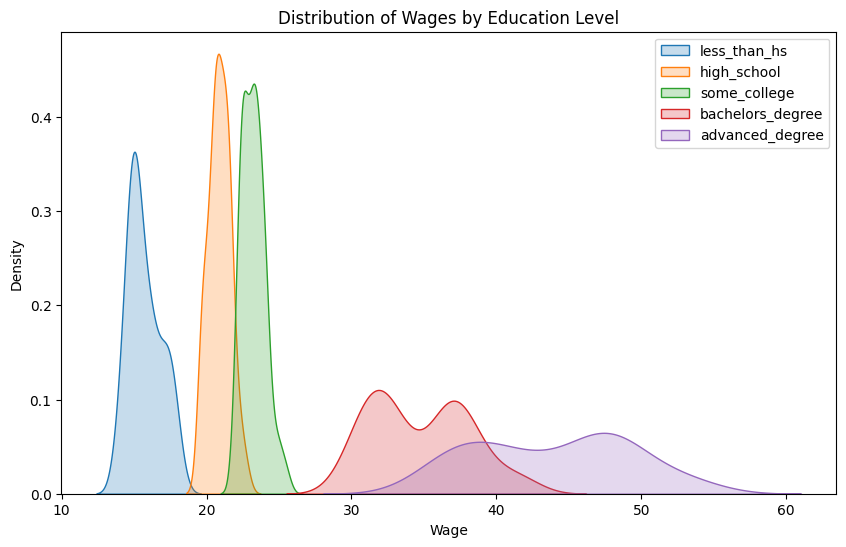

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for wages
education_levels = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']

# Plot histogram
plt.figure(figsize=(10, 6))
for level in education_levels:
    sns.kdeplot(df[level], label=level, shade=True)

plt.title("Distribution of Wages by Education Level")
plt.xlabel("Wage")
plt.ylabel("Density")
plt.legend()
plt.show()


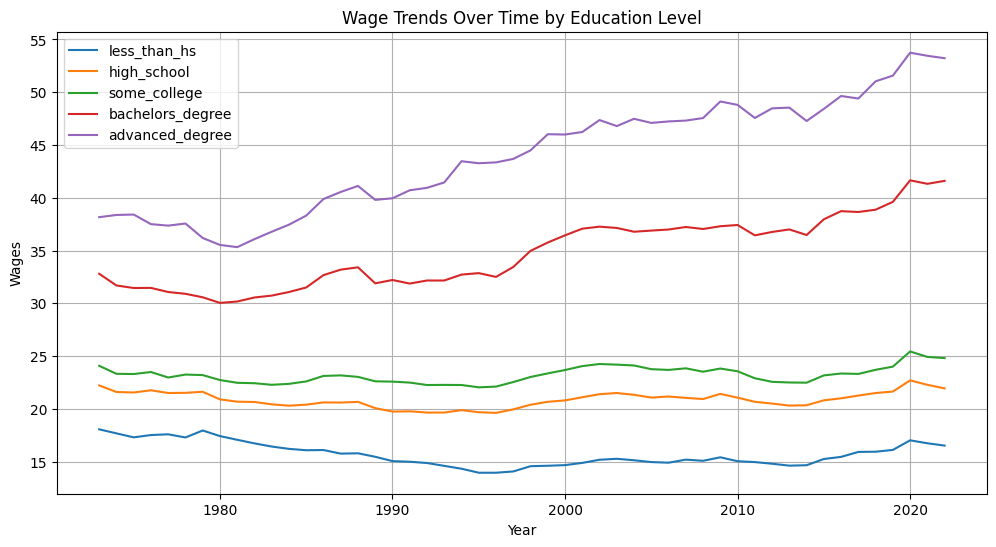

In [3]:
plt.figure(figsize=(12, 6))
for level in education_levels:
    plt.plot(df['year'], df[level], label=level)

plt.title("Wage Trends Over Time by Education Level")
plt.xlabel("Year")
plt.ylabel("Wages")
plt.legend()
plt.grid(True)
plt.show()

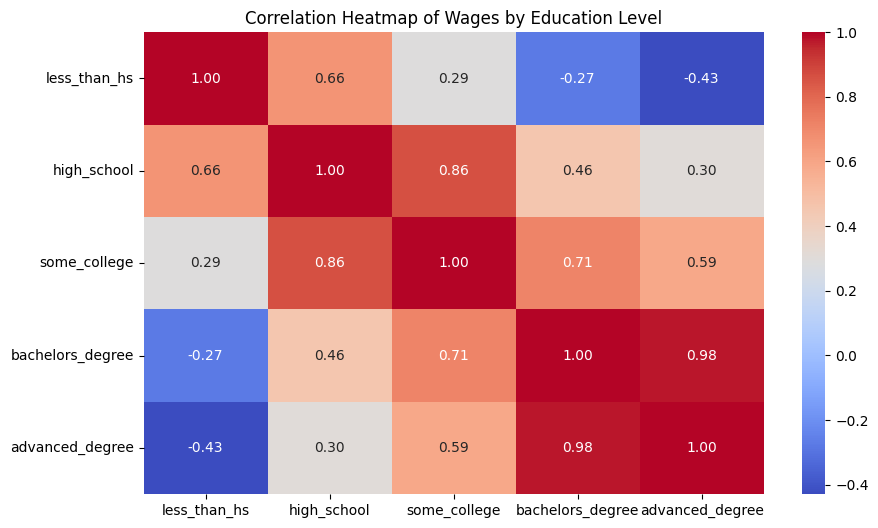

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[education_levels].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wages by Education Level")
plt.show()


# **Simple and Multiple Linear Regression Models**

In [5]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv("wages_by_education.csv")
education_levels = ["less_than_hs", "high_school", "some_college", "bachelors_degree", "advanced_degree"]
target_variable = "advanced_degree"  # You can modify this to another wage measure if needed
model_results = {}
for edu in education_levels:
    X = df[[edu]]
    X = sm.add_constant(X)  # Adding constant term
    Y = df[target_variable]  # Wages

    # Fit the model
    model = sm.OLS(Y, X).fit()

    # Store the summary
    model_results[edu] = model.summary()
for edu, summary in model_results.items():
    print(f"Regression results for {edu}:\n")
    print(summary)
    print("\n" + "="*80 + "\n")


Regression results for less_than_hs:

                            OLS Regression Results                            
Dep. Variable:        advanced_degree   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     10.86
Date:                Tue, 18 Feb 2025   Prob (F-statistic):            0.00185
Time:                        05:56:14   Log-Likelihood:                -148.78
No. Observations:                  50   AIC:                             301.6
Df Residuals:                      48   BIC:                             305.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const     

# **Multiple Linear Regression**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df[["bachelors_degree", "some_college", "high_school", "less_than_hs"]]
Y = df["advanced_degree"]  # Target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)
Y_pred = mlr_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {mlr_model.coef_}")
print(f"Intercept: {mlr_model.intercept_}")


Mean Squared Error: 0.562054379394965
Model Coefficients: [ 1.57777387 -1.09664509  0.94396736 -0.90692469]
Intercept: 8.98361299232645


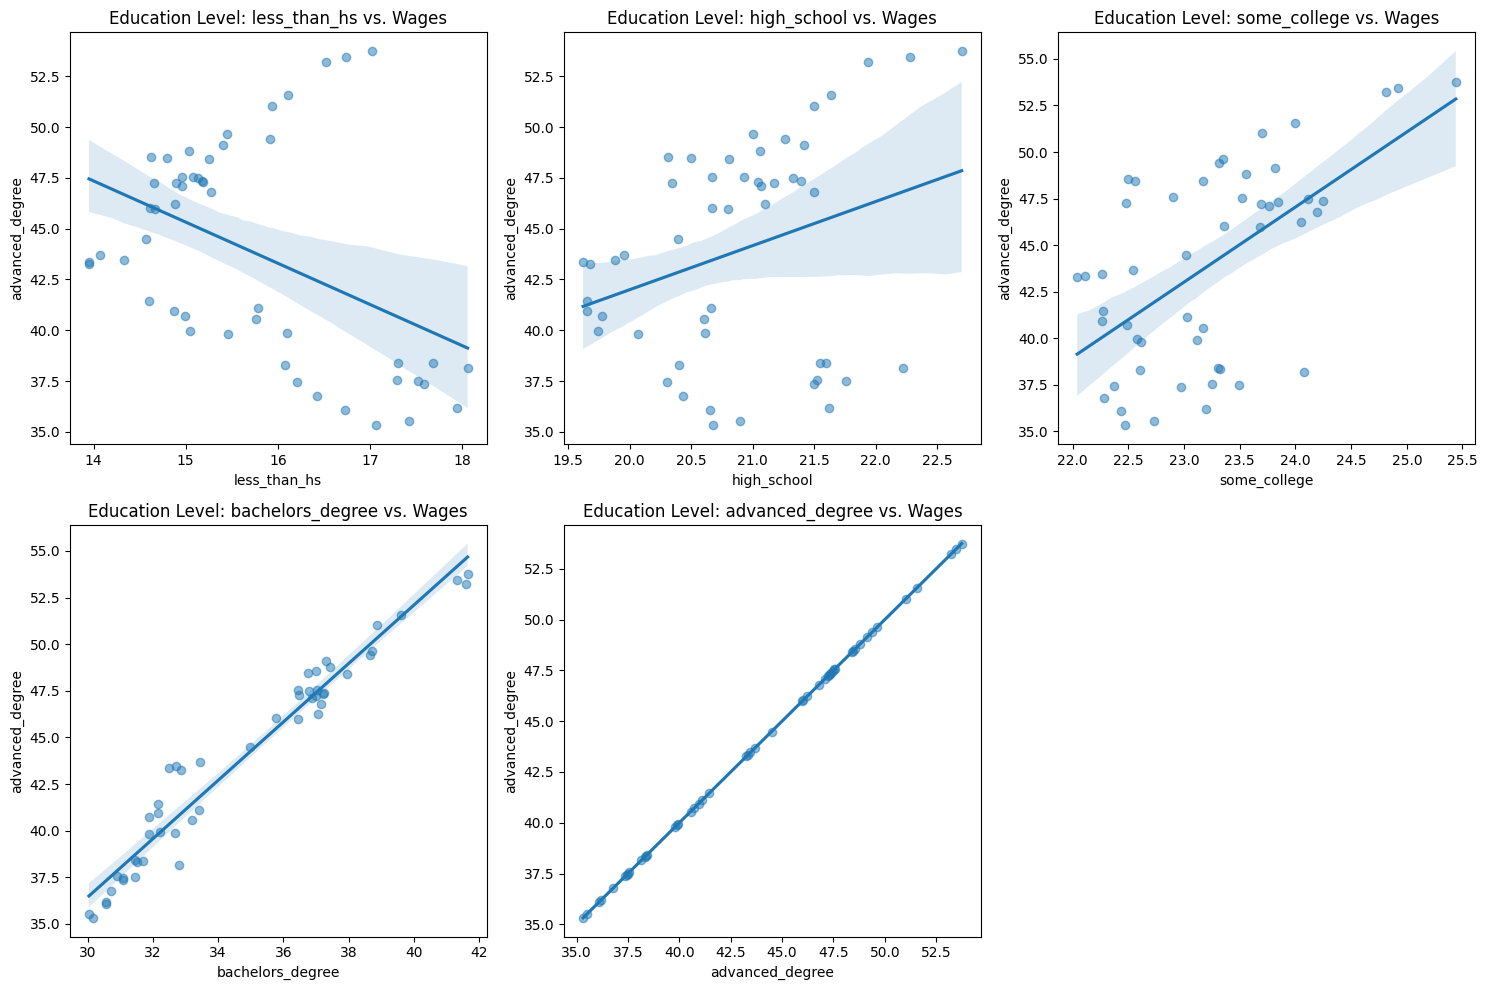

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("wages_by_education.csv")
education_levels = ["less_than_hs", "high_school", "some_college", "bachelors_degree", "advanced_degree"]
target_variable = "advanced_degree"  # Modify if needed
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, edu in enumerate(education_levels):
    sns.regplot(x=df[edu], y=df[target_variable], ax=axes[i], scatter_kws={"alpha":0.5})
    axes[i].set_title(f"Education Level: {edu} vs. Wages")
    axes[i].set_xlabel(edu)
    axes[i].set_ylabel(target_variable)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
